In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 50)

In [2]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

import neural_lib as nl

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Load dataset

In [4]:
df = pd.read_csv('data/train.csv')
print(df.shape)
df.head()

(159256, 24)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
features = df.drop(columns=['id','smoking']).columns
print(features)
print(len(features))

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')
22


## Binning

In [6]:
# df['Gtp>500'].value_counts()

In [7]:
df_bin = pd.DataFrame()

n_bins = 5

for col in ['height(cm)','weight(kg)','hemoglobin','triglyceride','Gtp']:
    
    if df[col].nunique() == 2:
        print(col, 'simple binarising')
        u = df[col].unique()[1]
        result = df[col] == u
        df_bin[col] = result
    else:
        quantiles = pd.cut(df[col], bins=n_bins, retbins=True)[1]
        quantiles = sorted(set(quantiles))
        print(col, 'binarising to 5 columns, boundaries:', quantiles)
        print()

        for q in quantiles:
            if q != quantiles[0]: 
                df_bin[f'{col}>{q:.0f}'] = df[col] > q

#         df = df.drop(columns=[col])
        
        
print(list(df_bin.columns))

# df_bin['height=>165'] = df['height(cm)'] >= 165 
# df_bin['height<165'] = df['height(cm)'] < 165

# df_bin['weight>=65'] = df['weight(kg)'] >= 65
# df_bin['weight<65'] = df['weight(kg)'] < 65

# df_bin['hemoglobin>=14.5'] = df['hemoglobin'] >= 14.5
# df_bin['hemoglobin<14.5'] = df['hemoglobin'] < 14.5


df_bin['smoking'] = df['smoking'] == 1

df_bin.head(5)

height(cm) binarising to 5 columns, boundaries: [134.945, 146.0, 157.0, 168.0, 179.0, 190.0]

weight(kg) binarising to 5 columns, boundaries: [29.9, 50.0, 70.0, 90.0, 110.0, 130.0]

hemoglobin binarising to 5 columns, boundaries: [4.883900000000001, 8.120000000000001, 11.34, 14.56, 17.78, 21.0]

triglyceride binarising to 5 columns, boundaries: [7.242, 159.6, 311.2, 462.79999999999995, 614.4, 766.0]

Gtp binarising to 5 columns, boundaries: [1.0030000000000001, 201.4, 400.8, 600.2, 799.6, 999.0]

['height(cm)>146', 'height(cm)>157', 'height(cm)>168', 'height(cm)>179', 'height(cm)>190', 'weight(kg)>50', 'weight(kg)>70', 'weight(kg)>90', 'weight(kg)>110', 'weight(kg)>130', 'hemoglobin>8', 'hemoglobin>11', 'hemoglobin>15', 'hemoglobin>18', 'hemoglobin>21', 'triglyceride>160', 'triglyceride>311', 'triglyceride>463', 'triglyceride>614', 'triglyceride>766', 'Gtp>201', 'Gtp>401', 'Gtp>600', 'Gtp>800', 'Gtp>999']


,height(cm)>146,height(cm)>157,height(cm)>168,height(cm)>179,height(cm)>190,weight(kg)>50,weight(kg)>70,weight(kg)>90,weight(kg)>110,weight(kg)>130,hemoglobin>8,hemoglobin>11,hemoglobin>15,hemoglobin>18,hemoglobin>21,triglyceride>160,triglyceride>311,triglyceride>463,triglyceride>614,triglyceride>766,Gtp>201,Gtp>401,Gtp>600,Gtp>800,Gtp>999,smoking
0,True,True,False,False,False,True,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True
1,True,True,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,True,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True
3,True,True,True,True,False,True,True,True,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [8]:
# df_bin = pd.DataFrame()

# df_bin['height=>165'] = df['height(cm)'] >= 165 
# df_bin['height<165'] = df['height(cm)'] < 165

# df_bin['weight>=65'] = df['weight(kg)'] >= 65
# df_bin['weight<65'] = df['weight(kg)'] < 65

# df_bin['hemoglobin>=14.5'] = df['hemoglobin'] >= 14.5
# df_bin['hemoglobin<14.5'] = df['hemoglobin'] < 14.5


# df_bin['smoking'] = df['smoking'] == 1

# df_bin.head(5)

In [9]:
df_bin['sample_id'] = np.arange(0, df_bin.shape[0], 1).astype(str)
df_bin['id'] = df_bin['sample_id'].apply(lambda x: 'h' + x)
df_bin.drop(columns=['sample_id'], inplace=True)
df_bin=df_bin.set_index('id')
df_bin.sample(n=1)

,height(cm)>146,height(cm)>157,height(cm)>168,height(cm)>179,height(cm)>190,weight(kg)>50,weight(kg)>70,weight(kg)>90,weight(kg)>110,weight(kg)>130,hemoglobin>8,hemoglobin>11,hemoglobin>15,hemoglobin>18,hemoglobin>21,triglyceride>160,triglyceride>311,triglyceride>463,triglyceride>614,triglyceride>766,Gtp>201,Gtp>401,Gtp>600,Gtp>800,Gtp>999,smoking
id,,,,,,,,,,,,,,,,,,,,,,,,,,
h63470,True,True,True,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True


# Step 1. Build Monotone Concept Lattice
Put binarized data in FormalContext and compute monotone ConceptLattice

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, roc_auc_score


y_feat = 'smoking'
df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)

print(df_train.shape[0], df_test.shape[0])

X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]

X_train.sample(n=1)

111479 47777


,height(cm)>146,height(cm)>157,height(cm)>168,height(cm)>179,height(cm)>190,weight(kg)>50,weight(kg)>70,weight(kg)>90,weight(kg)>110,weight(kg)>130,hemoglobin>8,hemoglobin>11,hemoglobin>15,hemoglobin>18,hemoglobin>21,triglyceride>160,triglyceride>311,triglyceride>463,triglyceride>614,triglyceride>766,Gtp>201,Gtp>401,Gtp>600,Gtp>800,Gtp>999
id,,,,,,,,,,,,,,,,,,,,,,,,,
h54206,True,True,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False


In [11]:
K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (111479 objects, 25 attributes, 712995 connections)
       |height(cm)>146|height(cm)>157|height(cm)>168|height(cm)>179|height(cm)>190|...|Gtp>201|Gtp>401|Gtp>600|Gtp>800|Gtp>999|
h54520 |             X|             X|              |              |              |...|       |       |       |       |       |
h134197|             X|             X|             X|              |              |...|       |       |       |       |       |
h135603|             X|             X|             X|              |              |...|       |       |       |       |       |
h93935 |             X|             X|             X|              |              |...|       |       |       |       |       |
h11867 |             X|             X|             X|              |              |...|       |       |       |       |       |
h33796 |             X|              |              |              |              |...|       |       |       |       |       |
h118830|             X|             X|

In [14]:
%%time 
L = ConceptLattice.from_context(K_train[:], is_monotone=True) # algo='Sofia'
len(L)

CPU times: total: 3min 11s
Wall time: 3min 15s


118

In [15]:
arr = []

for i, c in enumerate(L):
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
#     c.measures['f1_score'] = f1_score(y_train, y_preds)
#     c.measures['rocauc_score'] = roc_auc_score(y_train, y_preds)
#     c.measures['recall_score'] = recall_score(y_train, y_preds)
    
    arr.append([f1_score(y_train, y_preds),roc_auc_score(y_train, y_preds),recall_score(y_train, y_preds),])

In [16]:
stat = pd.DataFrame(arr, columns=['f1_score','rocauc_score','recall_score']).sort_values('rocauc_score',ascending=False)
# stat = pd.DataFrame([el.measures for el in L]).sort_values('rocauc_score',ascending=False)
stat

,f1_score,rocauc_score,recall_score
76,0.015989,0.501990,0.008102
78,0.016066,0.501939,0.008143
79,0.016263,0.501879,0.008246
80,0.016300,0.501826,0.008266
70,0.014503,0.501753,0.007341
...,...,...,...
113,0.017087,0.499801,0.008719
114,0.017086,0.499793,0.008719
115,0.017086,0.499785,0.008719
116,0.017086,0.499785,0.008719


Select indices of the best concepts from the lattice

In [31]:
best_concepts = stat.index[:18]

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

Construct neural network based on concept lattice

In [32]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

Setup visuzalier for the architecture

In [33]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [34]:
set(df_test.columns)

{'Gtp>201',
 'Gtp>401',
 'Gtp>600',
 'Gtp>800',
 'Gtp>999',
 'height(cm)>146',
 'height(cm)>157',
 'height(cm)>168',
 'height(cm)>179',
 'height(cm)>190',
 'hemoglobin>11',
 'hemoglobin>15',
 'hemoglobin>18',
 'hemoglobin>21',
 'hemoglobin>8',
 'smoking',
 'triglyceride>160',
 'triglyceride>311',
 'triglyceride>463',
 'triglyceride>614',
 'triglyceride>766',
 'weight(kg)>110',
 'weight(kg)>130',
 'weight(kg)>50',
 'weight(kg)>70',
 'weight(kg)>90'}

In [35]:
descr = {'weight(kg)>70', 'height(cm)>168'}

traced = cn.trace_description(descr, include_targets=False)

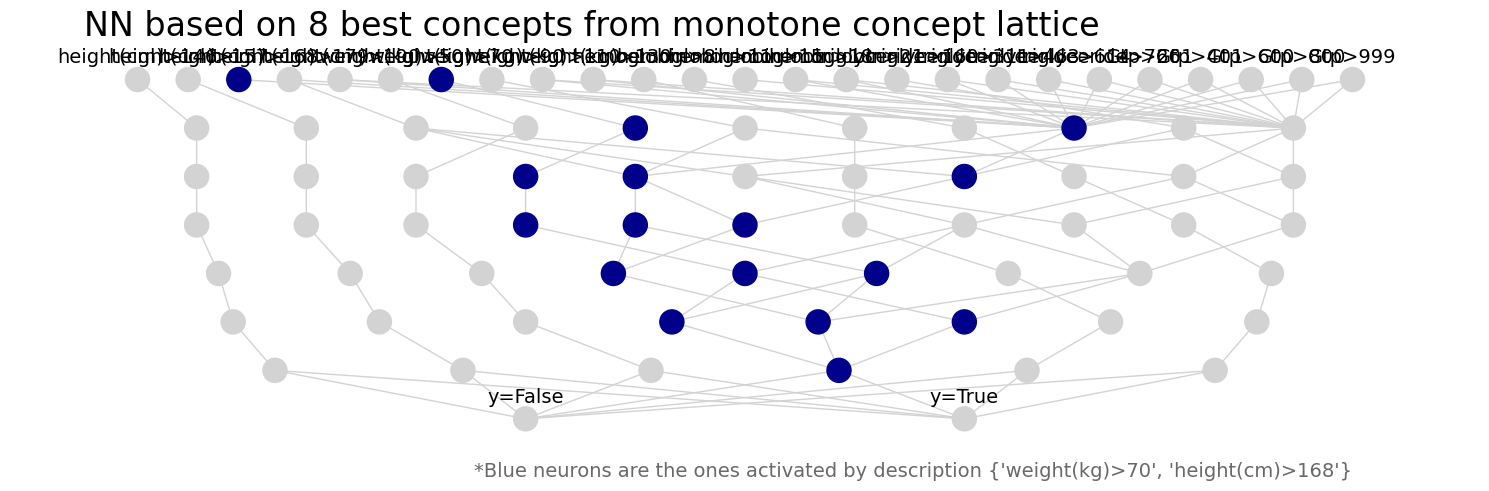

In [36]:
fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))]
)
plt.title(f'NN based on 8 best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('nn_silly_baseline.png')
plt.show()

# Fit

In [55]:
cn.fit(X_train.iloc[:], y_train.iloc[:], n_epochs = 1000)

In [56]:
y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

Class prediction [0 1 1 0 0 0 0 1 1 0]
Class prediction with probabilities [[0.97472644 0.02527356]
 [0.14939007 0.85060996]
 [0.3069268  0.6930733 ]
 [0.9051637  0.09483628]
 [0.97472644 0.02527356]
 [0.97472644 0.02527356]
 [0.97472644 0.02527356]
 [0.3069268  0.6930733 ]
 [0.14939007 0.85060996]
 [0.97472644 0.02527356]]
True class [False False  True  True  True  True False False  True False]


In [57]:
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1     score:', f1_score(y_test.values.astype('int'), y_pred))
print()
print('ROC AUC score:', roc_auc_score(y_test.values.astype('int'), y_pred))

Recall score: 0.6691403834260977
F1     score: 0.655238272697629

ROC AUC score: 0.6879301857330817


In [58]:
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))

Accuracy score: 0.6901856541850682
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     26756
           1       0.64      0.67      0.66     21021

    accuracy                           0.69     47777
   macro avg       0.69      0.69      0.69     47777
weighted avg       0.69      0.69      0.69     47777



Let us look at the fitted weights of edges

In [59]:
edge_weights = cn.edge_weights_from_network()

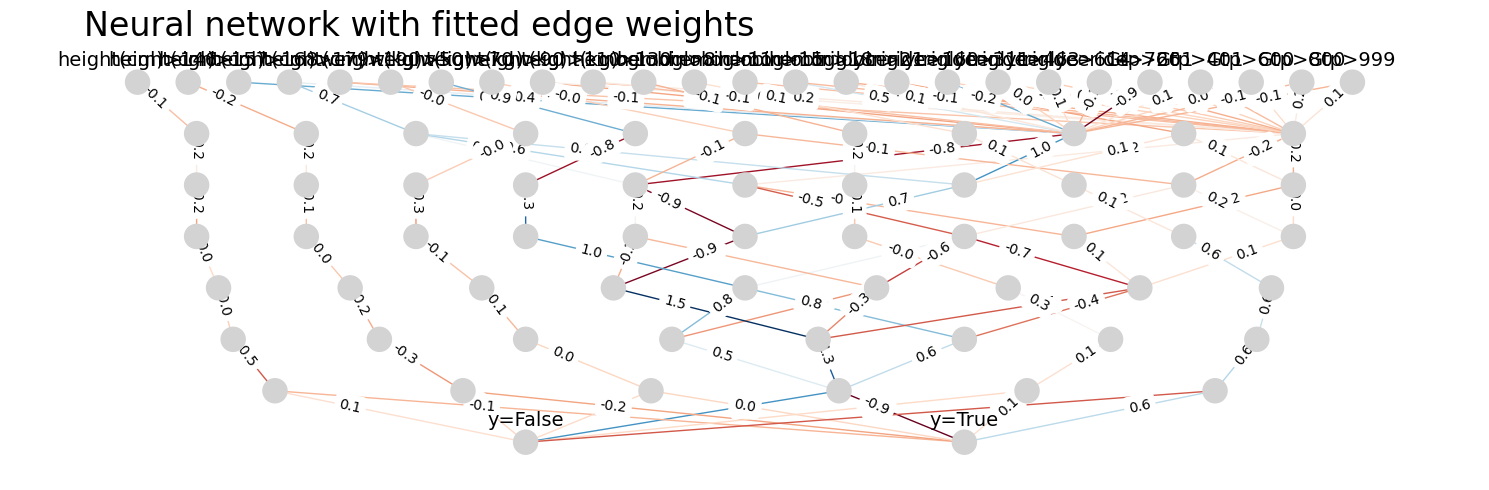

In [60]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network_silly_baseline.png')
plt.show()

## Try Different n_epochs

In [61]:
# # res = []

# # for n in [10,100,300,700,1000,1200,1500,2000,2500]:
# for n in [2700,3000,4000]:
#     cn.fit(X_train, y_train, n_epochs = n)

#     y_pred = cn.predict(X_test).numpy()
#     y_proba = cn.predict_proba(X_test).detach().numpy()

    
#     res.append([n, round(roc_auc_score(y_test.values.astype('int'), y_pred),4) ])
    
# res

In [62]:
# plt.figure(figsize=(4, 3))
# plt.plot([point[0] for point in res], [point[1] for point in res], marker='o', linestyle='-', label='')
# plt.title('Dependence of ROC AUC on the number of training epochs')
# plt.xlabel('number of epochs')
# plt.ylabel('ROC AUC score, test')
# plt.grid()
# plt.legend()
# plt.show()

## Trash

In [1]:
# import neural_lib2 as nl2
# from sparselinear import SparseLinear

In [ ]:
# ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --user
# ! pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.5.0+cpu.html

In [19]:
# ! pip install bitarray==2.7.5 --user

# L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)
# len(L)

# ! pip show fcapy # 0.1.4 по состояни. на 7 дек

# !pip install fcapy==0.1.4.1